# CS395 - Assignment 2
### Perceptrons  
<br>
By: Joshua Swick
Date: January 3rd, 2019

### 1. Run the code and show the result.

In [2]:
import numpy as np
class Perceptron:
    
    def __init__(self, input_length, weights=None):
        if weights is None:
            self.weights = np.ones(input_length) * 0.5
        else:
            self.weights = weights

    @staticmethod
    def unit_step_function(x):
        if x > 0.5:
            return 1
        return 0

    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return Perceptron.unit_step_function(weighted_sum)

In [3]:
p = Perceptron(2, np.array([0.5, 0.5]))

for x in [
    np.array([0, 0]),
    np.array([0, 1]),
    np.array([1, 0]),
    np.array([1, 1])
]:
    y = p(np.array(x))
    print(x,y)

[0 0] 0
[0 1] 0
[1 0] 0
[1 1] 1


### 2. Based on the code above, build an OR perceptron.

In [4]:
class OR_Perceptron:
    
    def __init__(self, input_length, weights=None):
        if weights is None:
            self.weights = np.ones(input_length) * 0.5
        else:
            self.weights = weights
            
    @staticmethod
    def unit_step_function(x):
        if x >= 0.5:
            return 1
        return 0
    
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return OR_Perceptron.unit_step_function(weighted_sum)

In [5]:
OR_p = OR_Perceptron(2, np.array([0.5, 0.5]))

for x in [
    np.array([0, 0]),
    np.array([0, 1]),
    np.array([1, 0]),
    np.array([1, 1])
]:
    y = OR_p(np.array(x))
    print(x,y)

[0 0] 0
[0 1] 1
[1 0] 1
[1 1] 1


### 3. Run the given code and show the result.

In [6]:
import numpy as np
from collections import Counter
class Perceptron:
    
    def __init__(self, input_length, weights=None):
        if weights == None:
            self.weights = np.random.random((input_length)) * 2 -1
        self.learning_rate = 0.1

    @staticmethod
    def unit_step_function(x):
        if x < 0:
            return 0
        return 1

    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return Perceptron.unit_step_function(weighted_sum)
    
    def adjust(self, target_result, calculated_result, in_data):
        error = target_result - calculated_result
        for i in range(len(in_data)):
            correction = error * in_data[i] * self.learning_rate
            self.weights[i] += correction

In [7]:
def above_line(point, line_func):
    x, y = point
    if y > line_func(x):
        return 1
    else:
        return 0
    
points = np.random.randint(1, 100, (100, 2))
p = Perceptron(2)
def lin1(x):
    return x + 4

for point in points:
    p.adjust(
        above_line(point, lin1),
        p(point),
        point
    )

evaluation = Counter()
for point in points:
    if p(point) == above_line(point, lin1):
        evaluation["correct"] += 1
    else:
        evaluation["wrong"] += 1

print(evaluation.most_common())

[('correct', 62), ('wrong', 38)]


### 4.  Is an activation function used? Describe the activation function used.

Yes, the activation function "unit_step_function" returns 1 or 0 based on the weighted input. With an input less than 0, the activation function return 0. If the condition does not meet the condition before, the activation function returns 1.

### 5.  What effect does changing the learning rate have?

The larger the learning rate, the faster the learning algorithm will converge. Too large and the learning algorithm will miss the minimum and might never converge. Too little and the learning algorithm will be slow and will take a long time to converge.

## Single Layer with Bias

### 6. Run code and show results.

0.4396985901144605


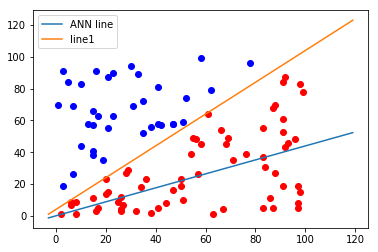

In [17]:
from matplotlib import pyplot as plt

cls = [[], []]

for point in points:
    cls[above_line(point, lin1)].append(tuple(point))

colours = ("r", "b")

for i in range(2):
    X, Y = zip(*cls[i])
    plt.scatter(X, Y, c=colours[i])

X = np.arange(-3, 120)

m = -p.weights[0] / p.weights[1]
print(m)

plt.plot(X, m*X, label="ANN line")
plt.plot(X, lin1(X), label="line1")
plt.legend()
plt.show()

### 7.  How is the line determined? What sets the slope and intercept of the line?

The line is determined by dividing the perceptron weights, after correcting for the error in the calculated result compared to the target result.

The statement, m = -p.weights[0] / p.weights[1], in the code above sets the slope and intercept is where the element in X equals zero.

### 8. Run the code. Show the results.

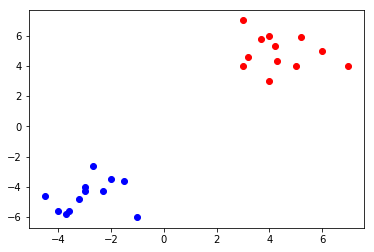

In [28]:
from matplotlib import pyplot as plt

class1 = [
    (3, 4), (4.2, 5.3), (4, 3), (6, 5), (4, 6), (3.7, 5.8),
    (3.2, 4.6), (5.2, 5.9), (5, 4), (7, 4), (3, 7), (4.3, 4.3)
]
class2 = [
    (-3, -4), (-2, -3.5), (-1, -6), (-3, -4.3), (-4, -5.6),
    (-3.2, -4.8), (-2.3, -4.3), (-2.7, -2.6), (-1.5, -3.6),
    (-3.6, -5.6), (-4.5, -4.6), (-3.7, -5.8)
]
    
X, Y = zip(*class1)
plt.scatter(X, Y, c="r")

X, Y = zip(*class2)
plt.scatter(X, Y, c="b")

plt.show()

In [29]:
from itertools import chain

p = Perceptron(2)
def lin1(x):
    return x + 4

for point in class1:
    p.adjust(1, p(point), point)

for point in class2:
    p.adjust(0, p(point), point)

evaluation = Counter()
for point in chain(class1, class2):
    if p(point) == 1:
        evaluation["correct"] += 1
    else:
        evaluation["wrong"] += 1

testpoints = [(3.9, 6.9), (-2.9, -5.9)]
for point in testpoints:
    print(p(point))
    
print(evaluation.most_common())

1
0
[('correct', 12), ('wrong', 12)]


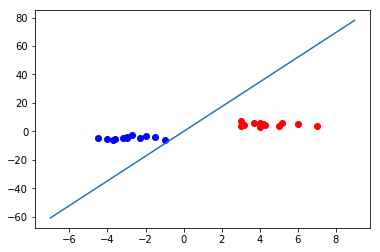

In [32]:
from matplotlib import pyplot as plt

X, Y = zip(*class1)
plt.scatter(X, Y, c="r")

X, Y = zip(*class2)
plt.scatter(X, Y, c="b")

x = np.arange(-7, 10)
y = 5*x + 10
m = -p.weights[0] / p.weights[1]
plt.plot(x, m*x)

plt.show()

### 9.  Does the line look the same as the line in the given graph? Why or why not?

No, because the slope of the line is being fit to the data. Using random numbers for the data set, means the line will be different.

## Linearly Separable and Inseparable Neural Networks

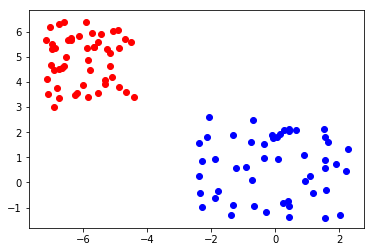

In [33]:
import numpy as np
from matplotlib import pyplot as plt

npoints = 50
X, Y = [], []

# class 0
X.append(np.random.uniform(low=-2.5, high=2.3, size=(npoints,)) )
Y.append(np.random.uniform(low=-1.7, high=2.8, size=(npoints,)))
# class 1
X.append(np.random.uniform(low=-7.2, high=-4.4, size=(npoints,)) )
Y.append(np.random.uniform(low=3, high=6.5, size=(npoints,)))

learnset = []
for i in range(2):
    # adding points of class i to learnset
    points = zip(X[i], Y[i])
    for p in points:
        learnset.append((p, i))
        
colours = ["b", "r"]
for i in range(2):
    plt.scatter(X[i], Y[i], c=colours[i])

[('correct', 70), ('wrong', 30)]
1.5685917517558743


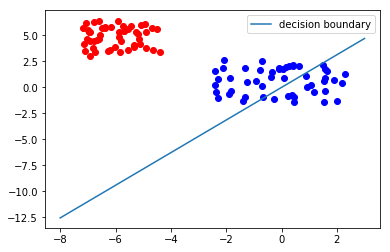

In [36]:
import numpy as np
from collections import Counter

class Perceptron:
    def __init__(self, input_length, weights=None):
        if weights==None:
            self.weights = np.random.random((input_length)) * 2 - 1
        self.learning_rate = 0.1
        
    @staticmethod
    def unit_step_function(x):
        if x < 0:
            return 0
        return 1
    
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return Perceptron.unit_step_function(weighted_sum)

    def adjust(self, target_result, calculated_result, in_data):
        error = target_result - calculated_result
        for i in range(len(in_data)):
            correction = error * in_data[i] *self.learning_rate
            self.weights[i] += correction

p = Perceptron(2)
for point, label in learnset:
    p.adjust(
        label,
        p(point),
        point
    )

evaluation = Counter()
for point, label in learnset:
    if p(point) == label:
        evaluation["correct"] += 1
    else:
        evaluation["wrong"] += 1

print(evaluation.most_common())

colours = ["b", "r"]
for i in range(2):
    plt.scatter(X[i], Y[i], c=colours[i])
    
XR = np.arange(-8, 4)

m = -p.weights[0] / p.weights[1]
print(m)

plt.plot(XR, m*XR, label="decision boundary")
plt.legend()
plt.show()

In [37]:
import numpy as np
from collections import Counter

class Perceptron:
    def __init__(self, input_length, weights=None):
        if weights==None:
            # input_length + 1 because bias needs a weight as well
            self.weights = np.random.random((input_length + 1)) * 2 - 1
        self.learning_rate = 0.05
        self.bias = 1

    @staticmethod
    def sigmoid_function(x):
        res = 1 / (1 + np.power(np.e, -x))
        return 0 if res < 0.5 else 1

    def __call__(self, in_data):
        weighted_input = self.weights[:-1] * in_data
        weighted_sum = weighted_input.sum() + self.bias *self.weights[-1]
        return Perceptron.sigmoid_function(weighted_sum)

    def adjust(self, target_result, calculated_result, in_data):
        error = target_result - calculated_result

        for i in range(len(in_data)):
            correction = error * in_data[i] * self.learning_rate
            #print("weights: ", self.weights)
            #print(target_result, calculated_result,
            #      in_data, error, correction)
            self.weights[i] += correction

        # correct the bias:
        correction = error * self.bias * self.learning_rate
        self.weights[-1] += correction


[('correct', 75), ('wrong', 25)]
1.3018707790779662 1.0749587151535982


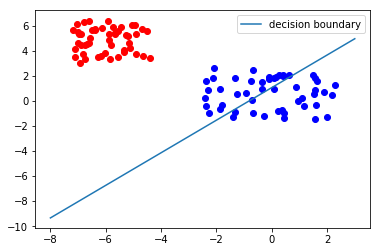

In [44]:
p = Perceptron(2)
for point, label in learnset:
    p.adjust(
        label,
        p(point),
        point
    )
    
    
evaluation = Counter()
for point, label in learnset:
    if p(point) == label:
        evaluation["correct"] += 1
    else:
        evaluation["wrong"] += 1

print(evaluation.most_common())

colours = ["b", "r"]

for i in range(2):
    plt.scatter(X[i], Y[i], c=colours[i])
    
XR = np.arange(-8, 4)

m = -p.weights[0] / p.weights[1]
b = -p.weights[-1]/p.weights[1]
print(m, b)

plt.plot(XR, m*XR + b, label="decision boundary")
plt.legend()
plt.show()

### 10.  Run the code several times. Do you get the same results?

No. We are using random numbers for the dataset, so each run will return different results.